In [1]:
import os
import sys
import copy
import keras
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# from model import get_model
from utils import *

In [2]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Dense, Reshape, Activation, TimeDistributed


def get_model():

    model = keras.models.Sequential()

    model.add(TimeDistributed(ZeroPadding2D(2), input_shape=(4, 64, 64, 3)))

    model.add(TimeDistributed(Conv2D(50, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D()))

    model.add(TimeDistributed(Conv2D(100, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Dropout(0.3)))

    model.add(TimeDistributed(Conv2D(100, kernel_size=(3,3), padding='same', activation='relu', strides=2)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Dropout(0.3)))

    model.add(TimeDistributed(Conv2D(200, kernel_size=(3,3), padding='same', activation='relu', strides=1)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Dropout(0.3)))

    model.add(Flatten())

    model.add(Dense(600, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(400, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Reshape((4, 4)))
    model.add(Activation('softmax'))

    return model

In [3]:
base_path = './../'


In [4]:
cuts = 2    
channel = 3
im_size = 128

In [5]:
model = get_model()

In [6]:
adam = keras.optimizers.Adam(lr=.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

c:\Users\suaar\anaconda3\envs\datathon\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
fileList = listOfFiles     

def imageLoader(files, batch_size):

    L = len(files)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X = someMethodToLoadImages(files[batch_start:limit])
            Y = someMethodToLoadTargets(files[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [7]:
x_val,   y_val   = load_data(base_path, 'all_data/valid')   
x_train, y_train = load_data(base_path, 'all_data/train')

entry 0
entry 1000
entry 2000
entry 3000
entry 4000
entry 5000
entry 6000
entry 7000
entry 8000
entry 9000
entry 0
entry 1000
entry 2000
entry 3000
entry 4000
entry 5000
entry 6000
entry 7000
entry 8000
entry 9000
entry 10000
entry 11000
entry 12000
entry 13000
entry 14000
entry 15000
entry 16000
entry 17000
entry 18000
entry 19000


In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))

622/622 [==============================] - 431s 687ms/step - loss: 0.5290 - val_loss: 0.3836


In [ ]:
model.save(path = os.getcwd() + '/model1.h5')

In [ ]:
from IPython.display import clear_output

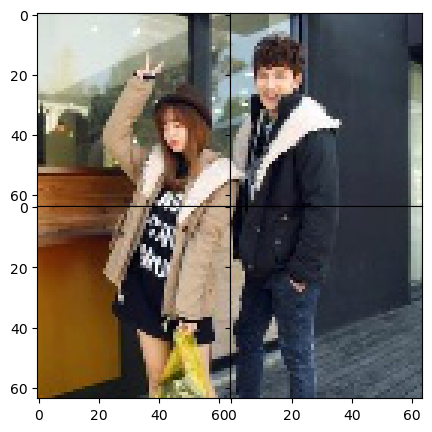

(4, 64, 64, 3)


c:\Users\suaar\OneDrive\Documents\datathon2022\src\utils.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([a[:, 0:cut_len, :], a[:, cut_len:, :]])


ValueError: could not broadcast input array from shape (4,64,64,3) into shape (4,)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes
                 )

im = 11
for ax, im in zip(grid, x_val[im].astype('float64')+.5):
    ax.imshow(im)

im = 11
plt.show()
# print(x_val.shape)
print(x_val[im].shape)
piece = extract_piece(x_val[im])
inp = np.expand_dims(piece, axis=0)
out = model.predict(inp)[0]
out = np.argmax(out, axis=1)
rearrange(np.array(x_val[im])+.5, out)

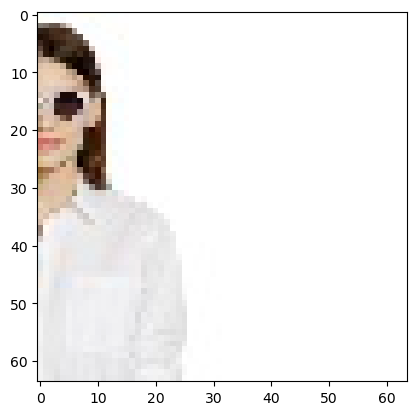

In [ ]:
im = 22

plt.imshow(x_val[im].astype('float64')+.5)

plt.show()

inp = np.expand_dims(extract_piece(x_val[im]), axis=0)
out = model.predict(inp)[0]
out = np.argmax(out, axis=1)
rearrange(np.array(x_val[im])+.5, out)

